### EJERCICIO 3:
Calcular el eror estándar de las betas del modelo lineal mediante un remuestreo bootstrap sobre la muestra y comparar los resultados con respecto a los obtenidos en clase.

In [2]:
#Importamos las librerias a utilizar
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [3]:
# Antes que nada obtenemos el directorio en el que estamos trabajando
os.getcwd()
# como no es el directorio en donde tenemos guardados los archivos, procedemos a actualizar
os.chdir("/Users/alexe/OneDrive/Escritorio/Titulacion/SeminarioEstadisticaI/Tarea1/")

In [81]:
hormonas=pd.read_excel("lineal_horm.xlsx")
hormonas

,lote,horas,monto
0,A,99,25.8
1,A,152,20.5
2,A,293,14.3
3,A,155,23.2
4,A,196,20.6
5,A,53,31.1
6,A,184,20.9
7,A,171,20.9
8,A,52,30.4
9,B,376,16.3


In [82]:
#creamos un vector para guardar los valores de los errores estandar de las betas de los modelos a calcular
vector = np.zeros(1000)

In [83]:
for i in range(1000):
    # Haremos un muestreo estratificado por lo que procederemos a separar la base en 3 nuevas bases, una para cada
    # compañia
    A = hormonas[0:9]
    B = hormonas[9:18]
    C = hormonas[18:27]
    # Hacemos el remuestreo para cada compañia de manera proporcional
    bootA = A.sample(n=9,replace=True)
    bootB = B.sample(n=9,replace=True)
    bootC = C.sample(n=9,replace=True)
    # Concatenamos los remuestreos para obtener un remuestreo estratificado de la informacion
    muestraboot = pd.concat([bootA, bootB, bootC], axis=0)
    # definimos la funcion del modelo lineal
    reg = linear_model.LinearRegression()
    # establecemos quien será la variable de respuesta y quién la explicativa
    X = muestraboot[["horas"]]
    y = muestraboot[["monto"]]
    # generamos nuestro modelo de regresión
    reg.fit(X, y)
    # Y procedemos al calculo del error de las betas del modelo para la i-ésima simulación
    # se generan las estimaciones del modelo
    Y_pred = reg.predict(X) 
    y_estim=Y_pred.reshape(-1)
    x=X.to_numpy().reshape(-1)
    #se guardan las observaciones del remuestreo bootstrap
    y_real=y.to_numpy()
    y_real=y_real.reshape(-1)
    n=len(y_real)
    # calculamos los residuales
    residual=y_real-y_estim
    # y finalmente calculamos el error estandar de la beta del modelo lineal
    den=sum((x-np.mean(x))**2)
    num=sum(residual**2)/(n)
    err_reg=np.sqrt(num/den)
    vector[i] = err_reg

##### NOTA:
Recordemos del ejercicio en clase que para la muestra original y el modelo construido, se habia ontenido para el error estandar del estimador beta el valor de 0.004295652626358282
Por lo que tomaremos este valor como referencia para nuestro grafico de la distribucion de los errores estandar de los parametros betas simulados.

Error Estándar sin Bootsrap(calculado en clase): 0.004295652626358282
Promedio de Error Estándar de la muestras Bootstrap: 0.004351309184799316
( 0.0031077221270092935 , 0.006129920576619933 )


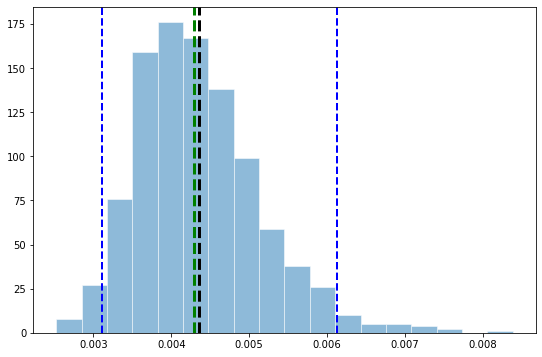

In [85]:
fig, ax = plt.subplots(figsize=(9,6))
plt.hist(vector,18,alpha=0.5,edgecolor="white",label="Error estándar Boostrap")
plt.axvline(x=0.004295652626358282,color='green', linestyle='--',linewidth=3,label="Error Estándar de b_1 con regresión$")
plt.axvline(x=np.mean(vector),color='black', linestyle='--',linewidth=3,label="Promedio error estándar de b_1 con  Boostrap$")

plt.axvline(np.percentile(vector,2.5),color="blue",linestyle="--",linewidth=2)                                                                                                                                                    
plt.axvline(np.percentile(vector,97.5),color="blue",linestyle="--",linewidth=2) 

print("Error Estándar sin Bootsrap(calculado en clase):", 0.004295652626358282)
print("Promedio de Error Estándar de la muestras Bootstrap:", np.mean(vector))
print("(", np.percentile(vector,2.5),",",np.percentile(vector,97.5),")")

#### Conclusiones:
Al comparar con respecto al modelo realizado en clase, podemos observar que al realizar un remuestreo bootstrap sobre la muestra, se logra una mayor precision del valor de nuestra estadistica, en este caso el error estandar de la beta, pues si tomamos como referencia al promedio de las simulaciones para esta estadistica, observamos valores mas cercanos al real, aunado a ello, se obtiene un intervalo de confianza ligeramente mas angosto, lo cual nos da indicios de una mejora en la precision de la estimacion. Todo esto, claro, comparando contra el remuestreo bootstrap sobre los residuales del modelo como el proceso realizado en clase. 